<a href="https://colab.research.google.com/github/anjaliagarwal8/V1_Resnet-NMA/blob/main/Feature_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Dependencies

In [1]:
#@title Downloading relevant prerequisites
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/NMADL_project/vonenet

!python setup.py install



Mounted at /content/drive
/content/drive/MyDrive/NMADL_project/vonenet
running install
running bdist_egg
running egg_info
writing vonenet.egg-info/PKG-INFO
writing dependency_links to vonenet.egg-info/dependency_links.txt
writing requirements to vonenet.egg-info/requires.txt
writing top-level names to vonenet.egg-info/top_level.txt
adding license file 'LICENSE'
writing manifest file 'vonenet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/vonenet
copying build/lib/vonenet/utils.py -> build/bdist.linux-x86_64/egg/vonenet
copying build/lib/vonenet/__init__.py -> build/bdist.linux-x86_64/egg/vonenet
copying build/lib/vonenet/back_ends.py -> build/bdist.linux-x86_64/egg/vonenet
copying build/lib/vonenet/params.py -> build/bdist.linux-x86_64/egg/vonenet
copying build/lib/vonenet/modules.py -> build/bdist.linux-x86_64/egg/vonenet
copying build/lib/von

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Activations

Loading Saved activations...

In [3]:
v1_resnet50_clean = torch.load('v1_resnet50_clean.pt')
resnet50_clean = torch.load('resnet50_clean.pt')
v1_resnet50_pert = torch.load('v1_resnet50_pert.pt')
resnet50_pert = torch.load('resnet50_pert.pt')

In [4]:
# Converting to numpy

v1_clean = [i.detach().cpu().numpy() for i in v1_resnet50_clean]
v1_pert = [i.detach().cpu().numpy() for i in v1_resnet50_pert]
res_clean = [i.detach().cpu().numpy() for i in resnet50_clean]
res_pert = [i.detach().cpu().numpy() for i in resnet50_pert]

# Deviation

In [5]:
num_layers = 52  # number of layers in the model
layers = []

for i in range(num_layers):
  layers.append(str(i+1))

v1 = {}
res = {}
v1_all = np.zeros((16,52))
res_all = np.zeros((16,52))

# calculate Pearson's distance for all pairwise comparisons 
for image in range(16):
  l = 0
  for layer in layers:
    v1[layer] = 1-np.corrcoef(v1_clean[l][image,:,:,:].flatten(),v1_pert[l][image,:,:,:].flatten())
    v1_all[image,l] = v1[layer][0][1] 
    res[layer] = 1-np.corrcoef(res_clean[l][image,:,:,:].flatten(),res_pert[l][image,:,:,:].flatten())
    res_all[image,l] = res[layer][0][1]
    l = l + 1


# Deviation Plots

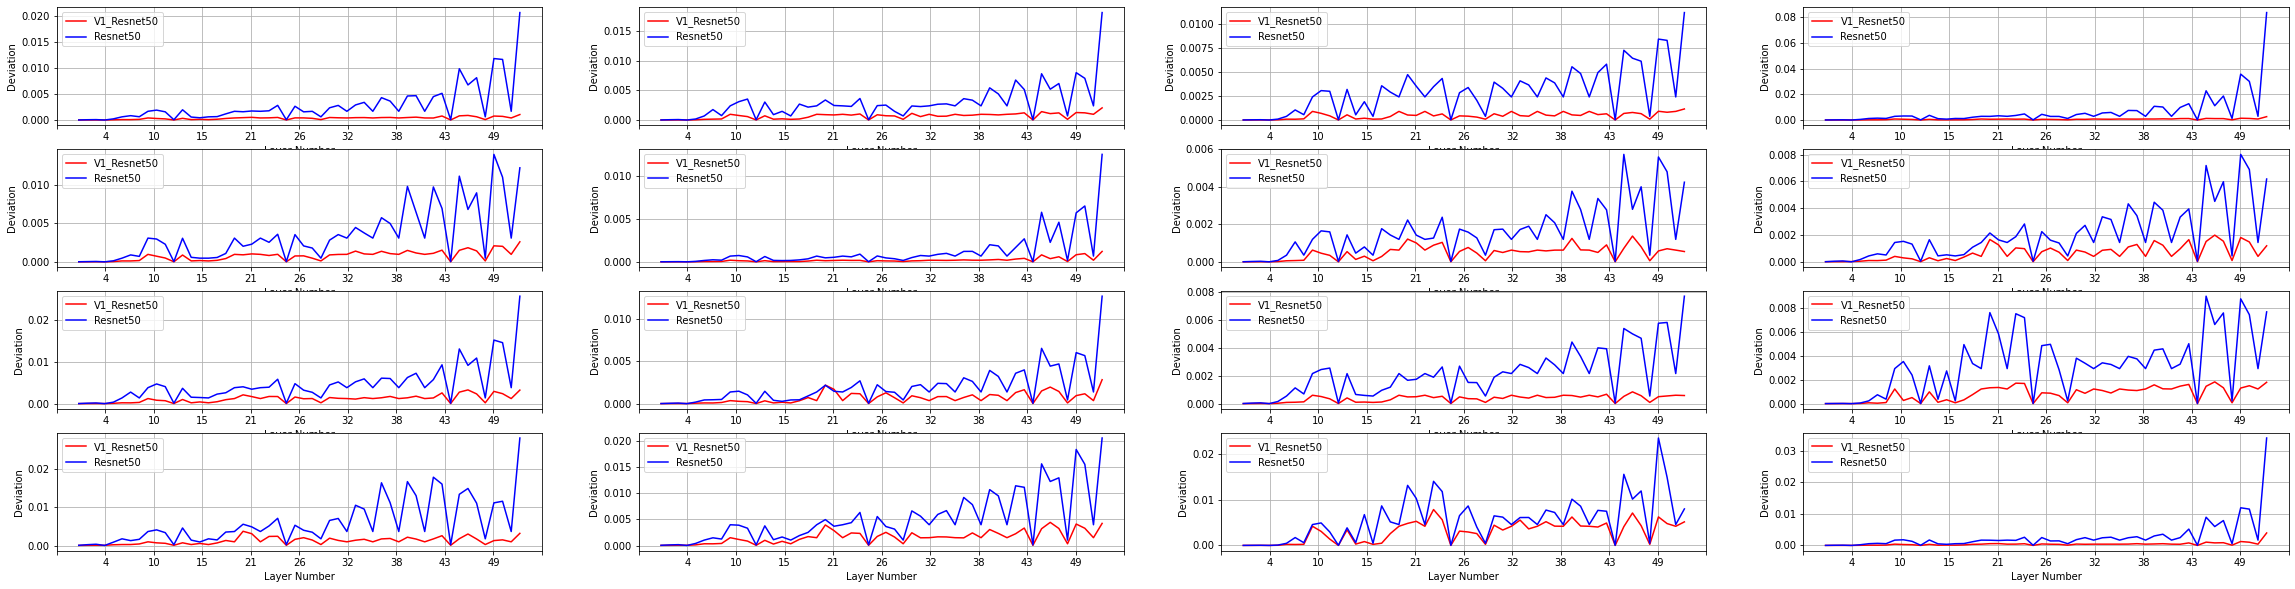

In [6]:
plt.figure(figsize=(40,10))
for image in range(16):
  ax = plt.subplot(4,4,image+1)
  plt.plot(layers,v1_all[image,:],'r')
  plt.plot(layers,res_all[image,:],'b')
  plt.xlabel('Layer Number')
  plt.ylabel('Deviation')
  plt.legend(['V1_Resnet50','Resnet50'])
  plt.grid()
  ax.xaxis.set_major_locator(plt.LinearLocator())
  #plt.xticks(np.arange(0,52,2), np.arange(0,52,2))

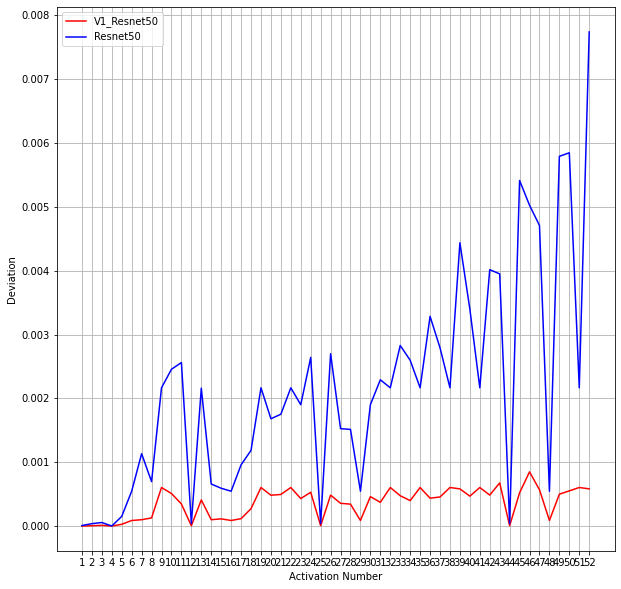

In [7]:
plt.figure(figsize=(10, 10))
plt.plot(layers,v1_all[10,:],'r')
plt.plot(layers,res_all[10,:],'b')
plt.xlabel('Activation Number')
plt.ylabel('Deviation')
plt.legend(['V1_Resnet50','Resnet50'])
plt.grid()
plt.show()

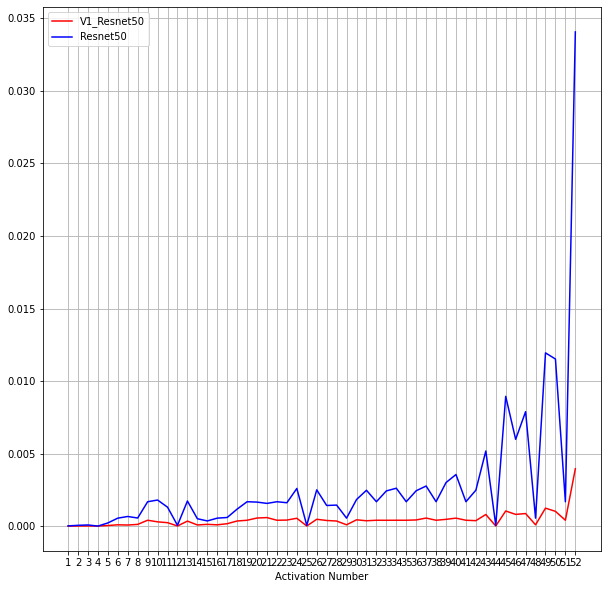

In [8]:
plt.figure(figsize=(10, 10))
plt.plot(layers,v1_all[15,:],'r')
plt.plot(layers,res_all[15,:],'b')
plt.xlabel('Activation Number')
plt.ylabel('Deviation')
plt.ylabel('')
plt.legend(['V1_Resnet50','Resnet50'])
plt.grid()
plt.show()

We can observe that V1 Resnet50 model has low deviation between clean and perturbed image as compared to vanilla Resnet50 model. 

We can also note that at four points the deviation of both V1 Resnet50 model and vanilla Resnet50 model is zero, i.e. there is no difference in clean and perturbed image. This occur at 4, 12, 25 and 44 points on the x-axis.

This correspond to layers:

4 - Layer 1, Bottleneck 0, Downsampling 

12 - Layer 2, Bottleneck 0, Conv2

25 - Layer 3, Bottleneck 0, Conv2

44 - Layer 4, Bottleneck 0, Conv2

In fact Conv2 blocks in every bottleneck of every layer is where we observe the dips. 

In [9]:
v1_clean[4][1,:,:,:].shape

(64, 56, 56)

In [10]:
temp = np.mean(v1_clean[4][1,:,:,:],axis=0)

In [11]:
temp.shape

(56, 56)

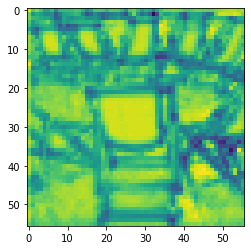

In [12]:
plt.imshow(temp)

In [13]:
pca = PCA(3)

converted_data = pca.fit_transform(v1_clean[4][1,:,:,:])
 
converted_data.shape

ValueError: ignored